**Question 1**

The difference between the "standard deviation" and the "standard error of the mean" is that the standard deviation measures the variability of a dataset around its mean, whereas the standard error of the mean measures how accurate a sample mean estimates the mean of the population after taking various samples. The standard deviation captures how spread the points in a data are, while the standard error of the mean captures how spread the mean would be if you were to calculate several sample means from a population.

**Question 2**

To create the 95% confidence interval of a bootstrapped dataset, you would first need to grab the critical value of the standard normal distribution for a 95% confidence interval (the value that represents the two values where there is a 95% probability of values appearing within for a standard normal distribution), which is approximately 2. Then, to get the 95% confidence interval of the bootstrapped sample means, you add and subtract the mean of the bootstrapped values by the product of the critical value and the standard error of the mean. By adding and subtracting, you get the upper and lower boundary, respectively, of the interval for which 95% of the bootstrapped sample means fall within.

**Question 3**

Since the 95% confidence interval is just the interval where 95% of the bootstrapped sample means fall in, to get this exact interval, all you would have to do is calculate the 0.025th and 0.975th quantile of the bootstrapped sample means, and those values would be your lower and upper boundaries of the 95% confidence interval. For example, if you were creating code and you had your bootstrapped sample means in the object *a*, what you would have to do to calculate the 95% confidence interval is to use np.quantile(*a, 0.025*) for the 0.025th quantile and np.quantile(*a, 0.975*) ofr the 0.975th quantile, and then you're basically done. You have your interval! (Of course its not as simple as that sometimes, and if you require the extra parameters of *np.quantile()* you would have to use them.)

**Question 4**

In [14]:
import numpy as np

# Generates reproducable random numbers
np.random.seed(42)

# Creates the mean and std of the population, and sets the sample size
population_mean = 50
population_std = 10
sample_size = 100

# Generates a sample based off the set mean, sample size, and std of the population
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# The number of bootstrapped samples that will be created
n_bootstrap = 10000

# Creates an array full of zeroes equal to the number of bootstrapped samples
boot_means = np.zeros(n_bootstrap)

# Generates a number of bootstrapped samples declared earlier
for i in range(n_bootstrap):
    # Generates bootstrapped sample through sampling with replacement
    boot_sample = np.random.choice(sample, size=sample_size, replace=True)
    # Calculates the mean of the current bootstrapped sample, and stores it into the declared array
    boot_means[i] = np.mean(boot_sample)
# Calculates the lower and upper boundary of the 95% confidence interval for the bootstrapped sample means
lower_bound = np.percentile(boot_means, 2.5)
upper_bound = np.percentile(boot_means, 97.5)
# Prints out the interval
print(f"Mean 95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean 95% Confidence Interval: [47.17, 50.70]


In [17]:
import numpy as np

# Generates reproducable random numbers
np.random.seed(42)

# Creates the mean and std of the population, and sets the sample size
population_mean = 50
population_std = 10
sample_size = 100

# Generates a sample based off the set mean, sample size, and std of the population
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# The number of bootstrapped samples that will be created
n_bootstrap = 10000

# Creates an array full of zeroes equal to the number of bootstrapped samples
boot_medians = np.zeros(n_bootstrap)

# Generates a number of bootstrapped samples declared earlier
for i in range(n_bootstrap):
    # Generates bootstrapped sample through sampling with replacement
    boot_sample = np.random.choice(sample, size=sample_size, replace=True)
    # Calculates the median of the current bootstrapped sample, and stores it into the declared array
    boot_medians[i] = np.median(boot_sample)
# Calculates the lower and upper boundary of the 95% confidence interval for the bootstrapped sample means
lower_bound = np.percentile(boot_medians, 2.5)
upper_bound = np.percentile(boot_medians, 97.5)
# Prints out the interval
print(f"Median 95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Median 95% Confidence Interval: [46.99, 51.34]


In [20]:
import numpy as np

# Generates reproducable random numbers
np.random.seed(42)

# Creates the mean and std of the population, and sets the sample size
population_mean = 50
population_std = 10
sample_size = 100

# Generates a sample based off the set mean, sample size, and std of the population
sample = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

# The number of bootstrapped samples that will be created
n_bootstrap = 10000

# Creates an array full of zeroes equal to the number of bootstrapped samples
boot_stds = np.zeros(n_bootstrap)

# Generates a number of bootstrapped samples declared earlier
for i in range(n_bootstrap):
    # Generates bootstrapped sample through sampling with replacement
    boot_sample = np.random.choice(sample, size=sample_size, replace=True)
    # Calculates the standard deviation of the current bootstrapped sample, and stores it into the declared array
    boot_stds[i] = np.std(boot_sample)
# Calculates the lower and upper boundary of the 95% confidence interval for the bootstrapped sample means
lower_bound = np.percentile(boot_stds, 2.5)
upper_bound = np.percentile(boot_stds, 97.5)
# Prints out the interval
print(f"Standard Deviation 95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Standard Deviation 95% Confidence Interval: [7.78, 10.15]


**Question 5:**

We need to distinguish the role of population parameters and the sample statistics because when it comes to confidence intervals, they both play different roles. Confidence intervals, at their core, are the estimations of the fixed population parameters based off the sample statistics of the samples derived from the same population. Population parameters, in a realistic setting, are unknown to us, which is why we use sample statistics to approximate them. Sample statistics ARE known, yet are variable due to the nature of sampling, making it impossible for us to calculate a population parameter. By using calculated sample statistics to calculate confidence intervals, all we are doing is narrowing down the possible values that a population parameter can be.

**Question 6:**

1. The process of bootstrapping is when you take the sample of a population and generate new samples of the same size using the same values of the original sample, using sampling with replacement to ensure variability amongst the bootstrapped samples.

2. The purpose of bootstrapping is to generate sample statistics that can be used to gain insight on the parameters of a derived population. Since in a realistic scenario we wouldn't be able to generate a multiple significant samples from a population, bootstrapping the existing samples is the next best option.

3. You would take the sample and generate bootstrapped samples out of it through sampling with replacement. Once you have created a satisifactory amount of bootstrapped samples, you would calculate the means of each sample. You would then compile those means into a bootstrapped sample means dataset, where you are then able to calculate that 95% confidence interval of the bootstrapped means. Whether your hypothesis was in the 95% confidence interval of the bootstrapped means would determine how plausible your guess of the population average was.

**Question 7:** 

A confidence interval overlapping zero fails to reject the null hypothesis because we cannot be confident that zero is not a possible value of the population mean, as it is within the 95% confidence interval of the bootstrapped means. While we can observe that sample mean statistic is never zero, it does not definitively rule out the possibility of a zero population mean. What would lead to the opposite conclusion in this context would be if zero was outside of the 95% confidence interval, where the interval is either beyond or before zero. Since zero would not be in the interval, we would be 95% confident that zero is not the population mean, therefore making it safe to assume that zero is not the population mean.

**Question 8:**

Here, we have the data of a new vaccine developed by Alitech, showing the ages, genders, and the before and after health score of the sample patients.

In [5]:
import pandas as pd

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/matthew-SG/Fall24_STA130_HW/refs/heads/main/Datasets/HW4_Dataset.csv'
data = pd.read_csv(url)

# If you want to see the entire DataFrame in Jupyter, use display instead of print
from IPython.display import display
display(data)

,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,1,45,M,84,86
1,2,34,F,78,86
2,3,29,M,83,80
3,4,52,F,81,86
4,5,37,M,81,84
5,6,41,F,80,86
6,7,33,M,79,86
7,8,48,F,85,82
8,9,26,M,76,83
9,10,39,F,83,84


What we want to examaine is the effectiveness of the vaccine, so first we want to see how patients have improved or deteriorated after taking the vaccine, so we calculate the difference of their final and initial health score.

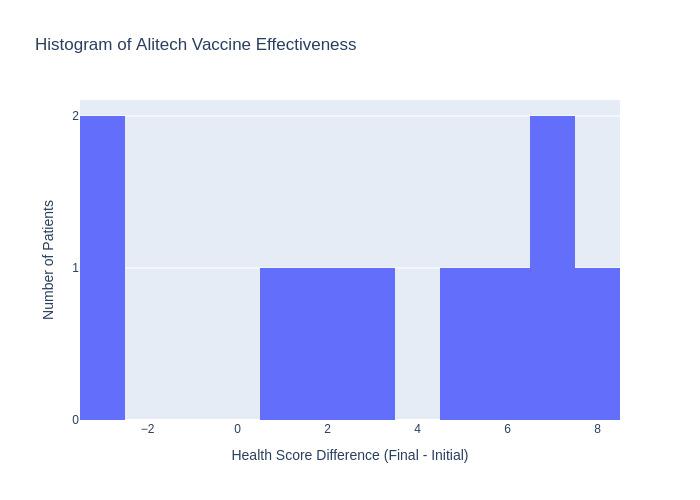

In [35]:
import pandas as pd
import plotly.express as px

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/matthew-SG/Fall24_STA130_HW/refs/heads/main/Datasets/HW4_Dataset.csv'
data = pd.read_csv(url)

# Assuming the dataset has two columns: 'Initial_Health_Score' and 'Final_Health_Score'
# Calculate the difference between the final and initial health scores
data['Health_Score_Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Create a histogram using Plotly
fig = px.histogram(data, x='Health_Score_Difference', nbins=20, title='Histogram of Alitech Vaccine Effectiveness')

# Customize axis labels
fig.update_layout(
    xaxis_title='Health Score Difference (Final - Initial)',
    yaxis_title='Number of Patients',
    yaxis = dict(tickmode='linear', tick0=0, dtick=1)  # Ensures y-axis uses integer values
)

# Show the plot
fig.show(renderer='png')

Now that we have a representation of the effectiveness of the vaccine for this sample, we can calculate the average effectiveness (difference) of the vaccine for this sample.

In [11]:
import pandas as pd

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/matthew-SG/Fall24_STA130_HW/refs/heads/main/Datasets/HW4_Dataset.csv'
data = pd.read_csv(url)

# Assuming the dataset has two columns: 'Initial_Health_Score' and 'Final_Health_Score'
# Calculate the difference between the final and initial health scores
data['Health_Score_Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Calculate the mean of the health score differences
mean_difference = data['Health_Score_Difference'].mean()

# Print the mean of the health score differences
print(f'Average Effectiveness of Alitech Vaccine: {mean_difference}')

Average Effectiveness of Alitech Vaccine: 3.3


So we can see in the context of this independent sample, the vaccine appears to be effecitve. However, this small sample cannot represent the effectiveness of the vaccine on the population, so we must simulate it somehow. We shall do this by creating bootstrapped samples of the dataset with the health score differences, then we shall calculate and gather the bootstrapped means of those datasets.

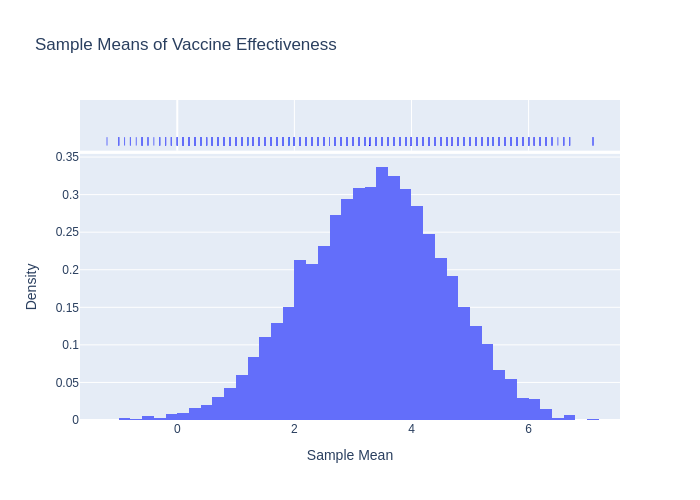

In [36]:
import pandas as pd
import numpy as np
import plotly.express as px

# Random seed for reproducible results
np.random.seed(143)

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/matthew-SG/Fall24_STA130_HW/refs/heads/main/Datasets/HW4_Dataset.csv'
data = pd.read_csv(url)

# Assuming the dataset has two columns: 'InitialHealthScore' and 'FinalHealthScore'
# Calculate the difference between the final and initial health scores
data['Health_Score_Difference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrap parameters
n_iterations = 10000  # Number of bootstrap samples
n_size = len(data)   # Sample size for each bootstrap

# Store bootstrapped means
boot_means = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Generate a bootstrapped sample (with replacement)
    sample = data['Health_Score_Difference'].sample(n=n_size, replace=True)
    # Calculate the mean of the sample
    boot_mean = sample.mean()
    # Store the bootstrapped mean
    boot_means.append(boot_mean)

# Convert to a DataFrame for easier handling
boot_means_df = pd.DataFrame(boot_means, columns=['Bootstrapped_Means'])

# Create the histogram using Plotly (displaying density instead of frequency)
fig = px.histogram(boot_means_df, x='Bootstrapped_Means', nbins=50, marginal="rug", 
                   histnorm='probability density',  # Set to density
                   title="Sample Means of Vaccine Effectiveness", 
                   labels={'Bootstrapped_Means': 'Sample Mean'})

# Update the layout to reflect density
fig.update_layout(
    xaxis_title='Sample Mean',
    yaxis_title='Density',
    showlegend=False
)

# Show the plot
fig.show(renderer='png')

Now that we have simulated thousands of more patients being effected through bootstrapping, we can make some observations. First lets examine the mean of sample means.

In [33]:
# Calculate the mean of the bootstrapped means
mean_bootstrapped_means = np.mean(boot_means)
print(f"Average vaccine effectiveness of bootstrapped samples: {mean_bootstrapped_means}")

Average vaccine effectiveness of bootstrapped samples: 3.30284


As we can see, in the context of the bootstrapped sample means, the average effectiveness appears to be positive, as in the vaccine improves patient health. But, we cannot be confident yet that the vaccine is effective for the actual population. For that, we must first determine the 95% confidence interval to approximate the population mean.

In [34]:
# Calculate the 95% confidence interval
lower_ci = np.percentile(boot_means, 2.5)  # 2.5th percentile
upper_ci = np.percentile(boot_means, 97.5)  # 97.5th percentile

print(f"95% Confidence Interval: ({lower_ci}, {upper_ci})")

95% Confidence Interval: (0.9, 5.6)


With this, we can be 95% confident that the estimated effectiveness of the vaccine lies within a health score difference of +0.9 and +5.6. With this, we can reject a null hypothesis, that the vaccine has no effect on the population (a health score difference of 0), as a health score difference of 0 does not lie within the 95% confidence interval. 

Other considerations of course must be taken to produce a more accurate conclusion, such as age and gender. However, for the purposes of the general population, the vaccine will confidently improve the health of those who take it.

**ChatGPT Summary**:

In this session, we discussed several aspects related to analyzing and visualizing a dataset of health scores. Here’s a summary of the key topics we covered:

1. **Distinguishing between Population Parameters and Sample Statistics**: We clarified the difference between population parameters (fixed, unknown quantities) and sample statistics (estimates based on sample data). Confidence intervals estimate population parameters using sample statistics.
   
2. **Creating a Reproducible Bootstrapping Process**: We implemented a Python script using `numpy`, `pandas`, and `plotly` to calculate the difference between initial and final health scores and perform bootstrapping to generate multiple sample means. We ensured reproducibility using `np.random.seed()`.

3. **Histogram of Bootstrapped Means**: Using the `plotly.express` library, we created a histogram to visualize the distribution of the bootstrapped means, switching between displaying density and frequency.

4. **Mean of Bootstrapped Means**: We calculated the mean of the bootstrapped means, adding a simple line of code to compute the average.

5. **95% Confidence Interval for Bootstrapped Means**: We extended the script to calculate and display the 95% confidence interval of the bootstrapped means by calculating the 2.5th and 97.5th percentiles. We also visually represented these bounds by adding vertical lines on the histogram.

Each step helped build a more complete understanding of bootstrapping, visualization, and confidence interval calculation. Let me know if you'd like any part of the code or explanation revisited!

https://chatgpt.com/share/66fde416-31a0-8003-8c3b-bc2bb50c16a3